In [1]:
import networkx as nx
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import ControlledGate
from qiskit.circuit.library.standard_gates import *
import random
import matplotlib.pyplot as plt

In [2]:
random.seed(275)
np.random.seed(275)

# Helper Functions

In [3]:
def generate_tsp_instance(num_cities):
    G = nx.erdos_renyi_graph(num_cities, 0.8)
    for e in G.edges():
        G.add_edge(e[0], e[1], weight=np.round(np.abs(np.random.normal(0,2)),3))
    return G

In [6]:
# Define TSP Instance
G = generate_tsp_instance(6)

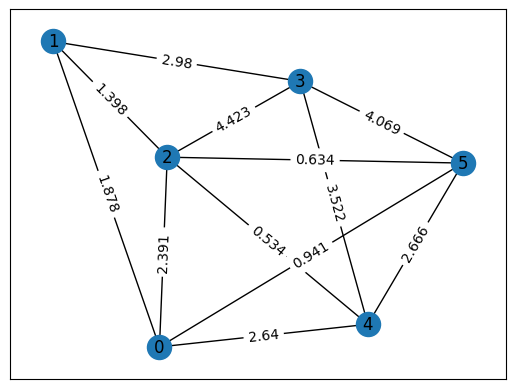

In [7]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [39]:
adj_matrix = nx.adjacency_matrix(G) # Adjacency Matrix for TSP Instance
adj_lists = [[c for c in G[i]] for i in G.nodes()] # Adjacency List for TSP Instance

## A. TSP Problem Encoding

In [24]:
# Helper Functions
def bitstring_to_decimal_path(N, m, bit_path):
    """ 
    Convert bitstring path to decimal path
    """
    int_path = []
    for i in range(N):
        city = bit_path[i * m : (i + 1) * m]
        print(city)
        int_path.append(int(city,2))
    return int_path

def cost(G, path):
    """ 
    Compute the cost of path specified by cycle register bitstring

    Params:
    * G - NetworkX Graph
    * path - Path indexing into adjacency lists
    """
    pass

def construct_cost_unitary(G, N, m, costs, path, city_unitaries):
    """ 
    Constructs the cost unitary that we use in QPE

    Params:
    * G - NetworkX Graph
    * path - Path indexing into adjacency lists
    """
    # N = len(G)
    # m = int(np.ceil(np.log(N)))
    # adj_lists = [[c for c in G[i]] for i in G.nodes()] # Adjacency List for TSP Instance
    # adj_matrix = 2 * np.pi * nx.adjacency_matrix(G)/np.sum(nx.adjacency_matrix(G))
    # num_P_j = len(adj_lists)
    # thetas = {i : [] for i in range(len(G))}
    # for j in range(N):
    #     for k in range(2**m):
    #         if k < num_P_j:
    #             thetas[j].append(np.exp(adj_matrix[j][k]))
    #         else:
    #             thetas[j].append(0) 
    city_unitaries = {i : 0 for i in range(len(G))}
    if m == 1:
        for j in range(N):
            diag_elems = []
            for k in range(2**m):
                diag_elems.append(costs[j][k])
            city_unitaries[j] = np.diag(diag_elems)
        return city_unitaries
    else:
        pass 

def construct_cost_unitary():

    
    


In [ ]:
# Problem parameters
N = 4 # Number of cities
m = int(np.ceil(np.log(N)))

cycle_reg = QuantumRegister(m * N)


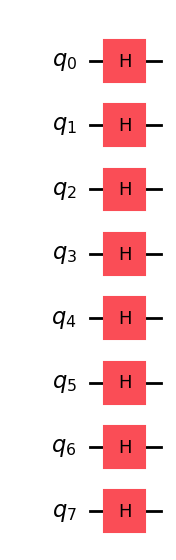

In [10]:
# Define your parameters
N = 4 # Example value for N
m = int(np.ceil(np.log(N))) # Number of qubits per-city

# Calculate the total number of qubits needed
cycle_register_size = m * N

# Create a quantum circuit with mN qubits
cycle_register = QuantumCircuit(cycle_register_size)

# Apply Hadamard gates to each qubit to put them in superposition
for qubit in range(cycle_register_size):
    cycle_register.h(qubit)
    
adj_matrix = nx.adjacency_matrix(G) # Adjacency Matrix for TSP Instance
adj_lists = [[c for c in G[i]] for i in G.nodes()] # Adjacency List for TSP Instance

cycle_register.draw('mpl')

In [70]:
t = N * m
qc = QuantumCircuit(N * m + t + 1)
for i in range(N * m, N * m + t):
    qc.h(i)
qc.draw()

q_0: ─────
           
 q_1: ─────
           
 q_2: ─────
           
 q_3: ─────
           
 q_4: ─────
           
 q_5: ─────
           
 q_6: ─────
           
 q_7: ─────
      ┌───┐
 q_8: ┤ H ├
      ├───┤
 q_9: ┤ H ├
      ├───┤
q_10: ┤ H ├
      ├───┤
q_11: ┤ H ├
      ├───┤
q_12: ┤ H ├
      ├───┤
q_13: ┤ H ├
      ├───┤
q_14: ┤ H ├
      ├───┤
q_15: ┤ H ├
      └───┘
q_16: ─────

## Implementation of CLC Oracle

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.circuit.library import ZGate
# from qiskit.circuit.library import cz
from qiskit.circuit.library import IntegerComparator
m = 2
t = 3
N = 6

U_gate = ZGate
U_gate_dagger = ZGate

# Create Quantum Registers
qr_C = QuantumRegister(m * N, 'C')
qr_t = QuantumRegister(t, 't')
qr_R = QuantumRegister(1, 'R')

# Create Quantum Circuit
circuit = QuantumCircuit(qr_C, qr_t, qr_R)

# Apply H gates to each qubit in the t register
circuit.h(qr_t)


count = 0
while count < t:
    for j in range(int(2**count)):
        for i in range(m * N):
            circuit.cz(qr_t[count], qr_C[i])  # Controlled on target qubits
    count += 1


# Apply the inverse Quantum Fourier Transform on t qubits
circuit.append(QFT(num_qubits=t, inverse=True), qr_t)

# <Cth
# circuit.append(IntegerComparator(num_state_qubits=t, value=1, geq=False))

# Apply the Quantum Fourier Transform on t qubits
circuit.append(QFT(num_qubits=t), qr_t)

count = 0
while count < t:
    for j in range(int(2**count)):
        for i in range(m * N):
            circuit.cz(qr_t[count], qr_C[i])  # Controlled on target qubits
    count += 1

# Apply H gates to each qubit in the t register again
circuit.h(qr_t)

# Draw the circuit
print(circuit)